# Sales Analysis

#### Import libraries

In [2]:
import pandas as pd
import os

#### Task #1: Merging 12 months of sales into a single file

In [5]:

files = [file for file in os.listdir('./Sales')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("Sales/"+file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [9]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

In [17]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### Find "Or" and delete it

In [19]:
temp_df = all_data[all_data["Order Date"].str[0:2] == "Or"]
temp_df.head()

all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

#### Convert columns to correct type

In [23]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) # Make int
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"]) # Make float
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


#### Augement data with additional columns

#### Task 2 : Add month column

In [20]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3 : Add a sales column

In [24]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4 : Add a city column

In [77]:
# all_data["City"] = all_data["Purchase Address"].apply(lambda x: x.split(",")[1])
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Question 1 : What was the best month for sales? How much was earned that month?

In [31]:
all_data.groupby("Month").sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


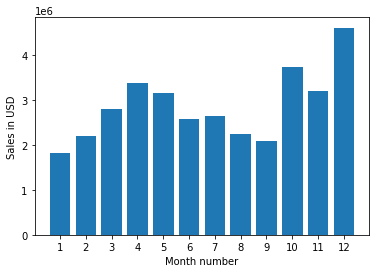

In [37]:
import matplotlib.pyplot as plt

months = range(1,13)
sales = all_data.groupby("Month").sum()["Sales"]

plt.bar(months,sales)
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month number")
plt.show()

#### Question 2 : What city had the highest number of sales

In [78]:
all_data.groupby("City").sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


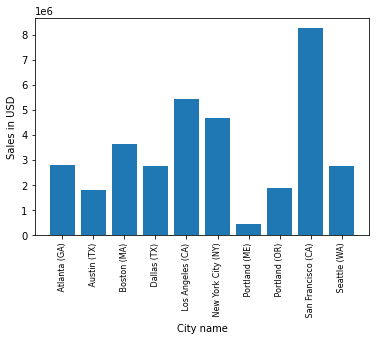

In [82]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby("City")]
sales = all_data.groupby("City").sum()["Sales"]

plt.bar(cities,sales)
plt.xticks(cities, rotation="vertical", size=8)
plt.ylabel("Sales in USD")
plt.xlabel("City name")
plt.show()

##### San Francisco (California) is the city who had the highest amount of sales, and Portland the lowest, we can infer that the size and development of the city, is a crucial factor in sales.


### Question 3 : What time should we display advertisements to maximize likelihood of costumer's buying product?

In [86]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])


In [89]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


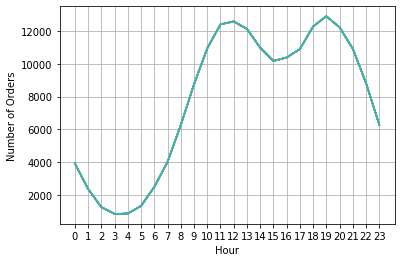

In [99]:
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()
# all_data.groupby(["Hour"]).count().head(3) # number of ocurrencies of hours

##### This graph show us the peaks, at which hour the people is usually getting orders, to answer the question, it should be a nice strategie to release advertisements, around 10-11 and 17-19

#### Question 4 : What products are most often sold together?

In [108]:
df = all_data[all_data["Order ID"].duplicated(keep=False)] # Only duplicated ids, (more than 1 product bought(same order))
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df = df[["Order ID","Grouped"]].drop_duplicates()
df.head()

C:\Users\julin\AppData\Local\Temp\ipykernel_2912\1031864283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [114]:
from collections import Counter
from itertools import combinations

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(3)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447)]

#### Question 6 : What product sold the most?

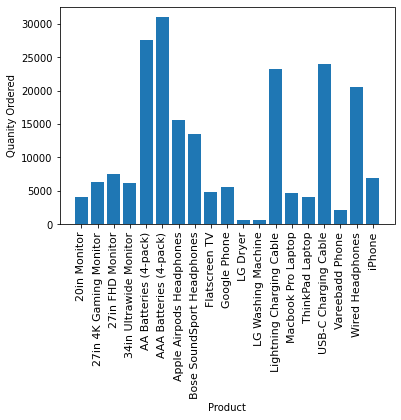

In [127]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xlabel("Product")
plt.ylabel("Quanity Ordered")
plt.xticks(products, rotation='vertical', size = 11)
plt.show()

C:\Users\julin\AppData\Local\Temp\ipykernel_2912\2423153194.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\julin\AppData\Local\Temp\ipykernel_2912\2423153194.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


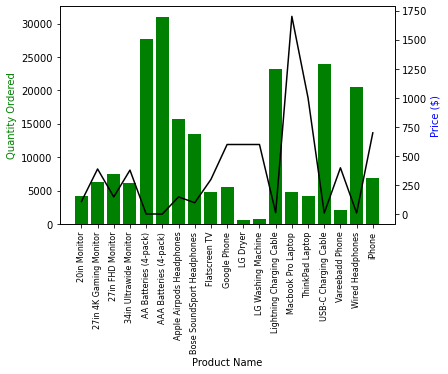

In [138]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='black')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()